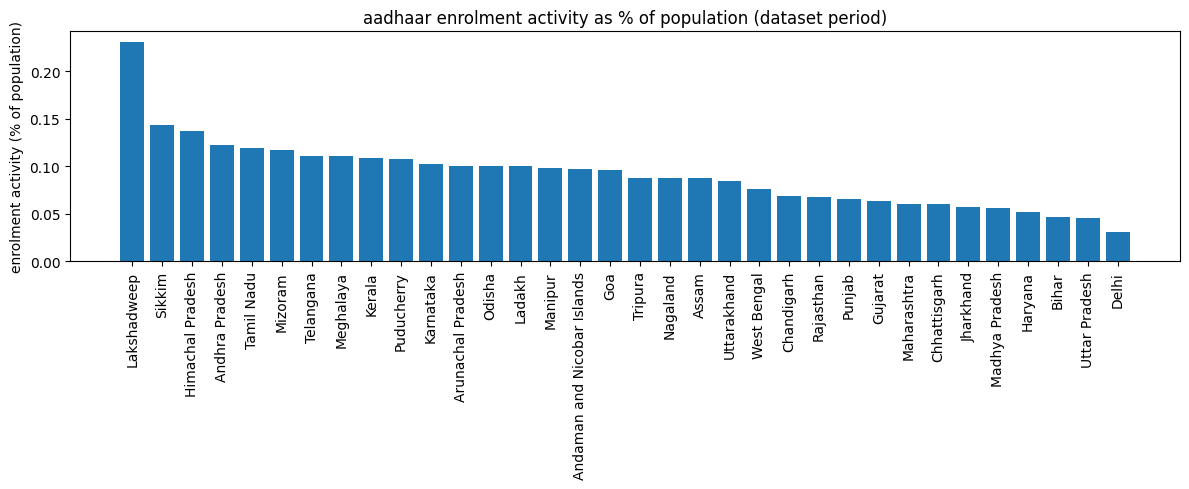

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# enrolment activity
enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrolments=(
    enrolment_df
    .groupby("state")
    .size()
    .reset_index(name="enrolment_events")
)

# population
population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")
population=population.rename(columns={
    "State/UT":"state",
    "Population 2025":"population"
})
population["population"]=(
    population["population"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)

# merge
df=enrolments.merge(population,on="state",how="inner")

# enrolment activity percentage
df["enrolment_activity_percent"]=(df["enrolment_events"]/df["population"])*100
df=df.sort_values("enrolment_activity_percent",ascending=False)

# plot
plt.figure(figsize=(12,5))
plt.bar(df["state"],df["enrolment_activity_percent"])
plt.xticks(rotation=90)
plt.ylabel("enrolment activity (% of population)")
plt.title("aadhaar enrolment activity as % of population (dataset period)")
plt.tight_layout()
plt.show()
